# Importing Libraries and Data 📚

In [1]:
from IPython.display import HTML
f = open("../input/notebookassets/blue.css").read()
HTML(f"<style>{f}</style>")

In [2]:
! pip install -q dabl rich

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 0.1.0b20210210 requires numpy==1.19, but you have numpy 1.19.5 which is incompatible.
autogluon-core 0.1.0b20210210 requires scikit-learn<0.24,>=0.22.0, but you have scikit-learn 0.24.1 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

import plotly
import plotly.figure_factory as ff

import rich
import dabl

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 15)]
warnings.simplefilter("ignore")

In [4]:
data = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis 📊

In [5]:
print(f"Shape of data is: {data.shape}")

Shape of data is: (5110, 12)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Let's check the Null values in the dataset and their proportions.

In [8]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see from above list that only the column with Null values is `bmi`.

Let's see what percentage of values in `bmi` column are Null.

In [9]:
percent_null_bmi = (data['bmi'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 3.93%


In [10]:
# Let's drop the Null values
data = data.dropna()

## Age 📟

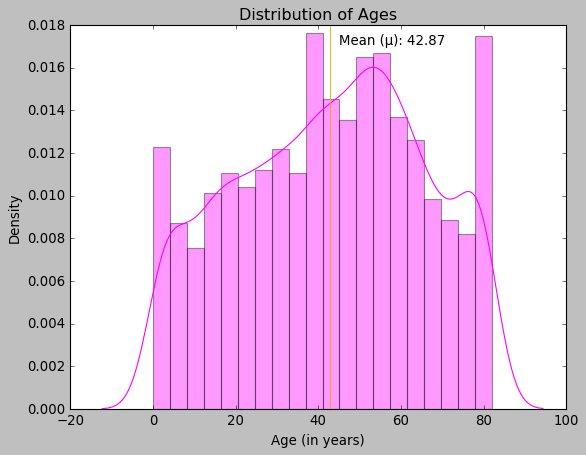

In [11]:
plt.style.use("classic")
sns.distplot(data['age'], color='magenta', kde=True)
plt.axvline(data['age'].mean(), color='orange', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(data['age'].mean()*1.05, max_ylim*0.95, 'Mean (μ): {:.2f}'.format(data['age'].mean()))
plt.xlabel("Age (in years)")
plt.title(f"Distribution of Ages")
plt.show()

## Gender ♀♂

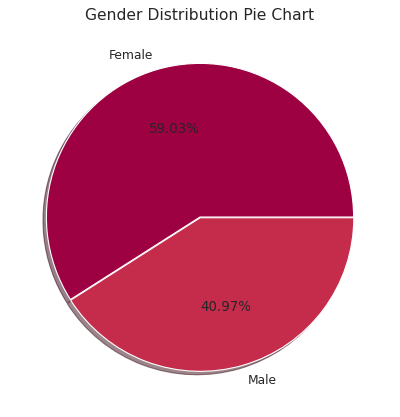

In [12]:
sns.set(style="whitegrid")
labels = data['gender'].value_counts().index.tolist()[:2]
values = data['gender'].value_counts().tolist()[:2]

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors, explode=[0, 0.005], shadow=True)
plt.title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

## Hypertension 🛑

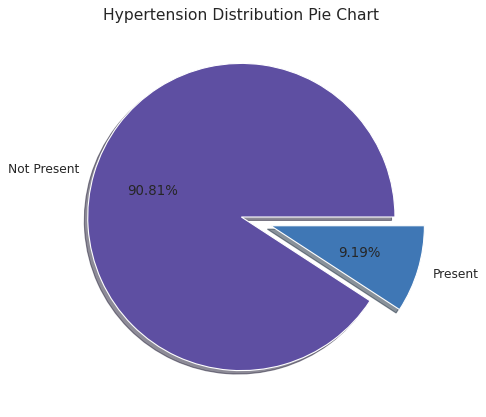

In [13]:
sns.set(style="whitegrid")
labels = ["Not Present", "Present"]
values = data['hypertension'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors[::-1], shadow=True, explode=[0, 0.2])
plt.title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

## Presence of Heart Disease ❤ 

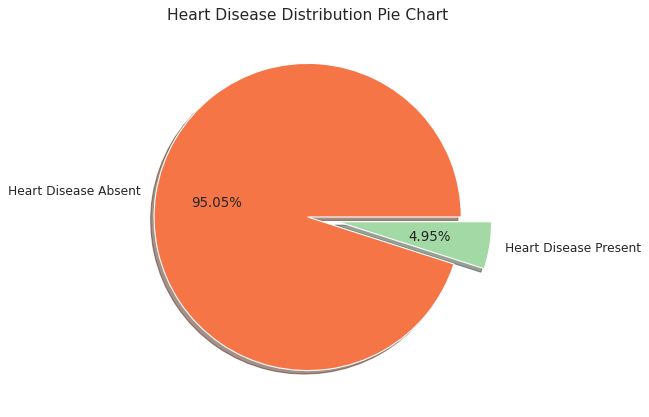

In [14]:
sns.set(style="whitegrid")
random.shuffle(colors)
labels = ["Heart Disease Absent", "Heart Disease Present"]
values = data['heart_disease'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors, shadow=True, explode=[0, 0.2])
plt.title("Heart Disease Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

## Ever Married? 💍

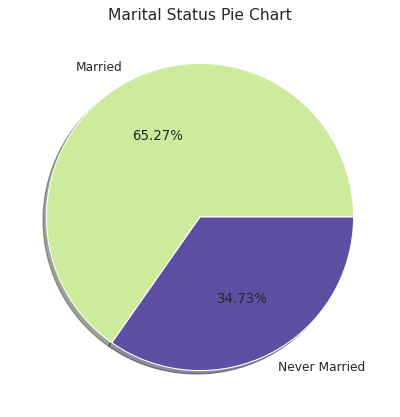

In [15]:
sns.set(style="whitegrid")
random.shuffle(colors)
labels = ["Married", "Never Married"]
values = data['ever_married'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors, shadow=True)
plt.title("Marital Status Pie Chart", fontdict={'fontsize': 14})
plt.show()

## Work Type 👨‍🏭

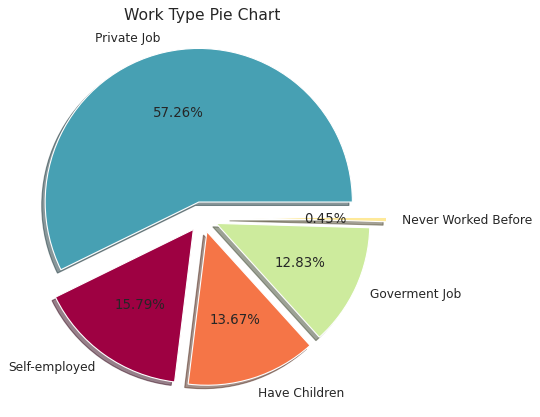

In [16]:
sns.set(style="whitegrid")
random.shuffle(colors)
labels = ["Private Job", "Self-employed", "Have Children", "Goverment Job", "Never Worked Before"]
values = data['work_type'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors, shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2])
plt.title("Work Type Pie Chart", fontdict={'fontsize': 14})
plt.show()

## Residence Type 🏡

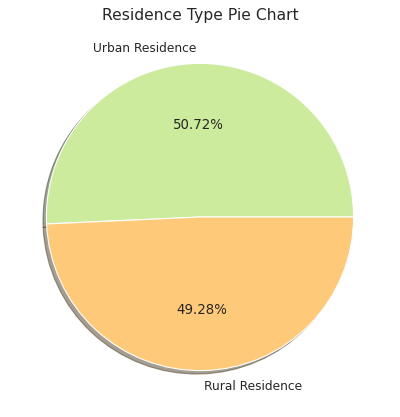

In [17]:
sns.set(style="whitegrid")
random.shuffle(colors)
labels = ["Urban Residence", "Rural Residence"]
values = data['Residence_type'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors, shadow=True)
plt.title("Residence Type Pie Chart", fontdict={'fontsize': 14})
plt.show()

## Average Glucose level of the Patient 💉

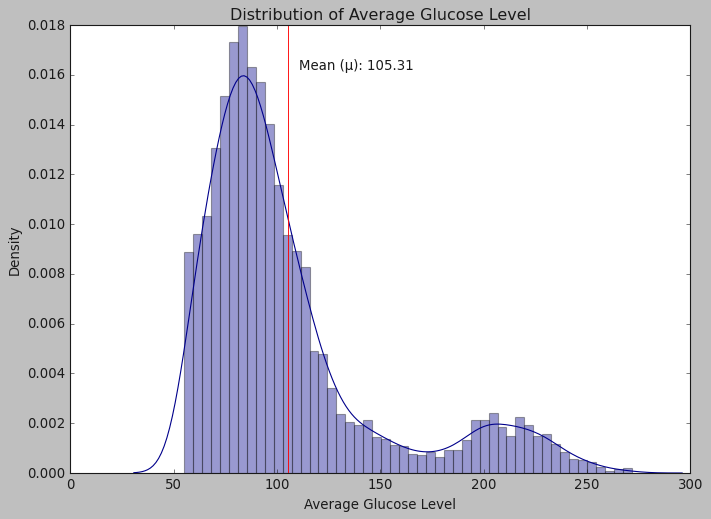

In [18]:
plt.style.use("classic")
plt.figure(figsize=(10, 7))
sns.distplot(data['avg_glucose_level'], color='darkblue', kde=True)
plt.axvline(data['avg_glucose_level'].mean(), color='red', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(data['avg_glucose_level'].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(data['avg_glucose_level'].mean()))
plt.xlabel("Average Glucose Level")
plt.title(f"Distribution of Average Glucose Level")
plt.show()

## Body Mass Index of Patient (`BMI`) 🦴

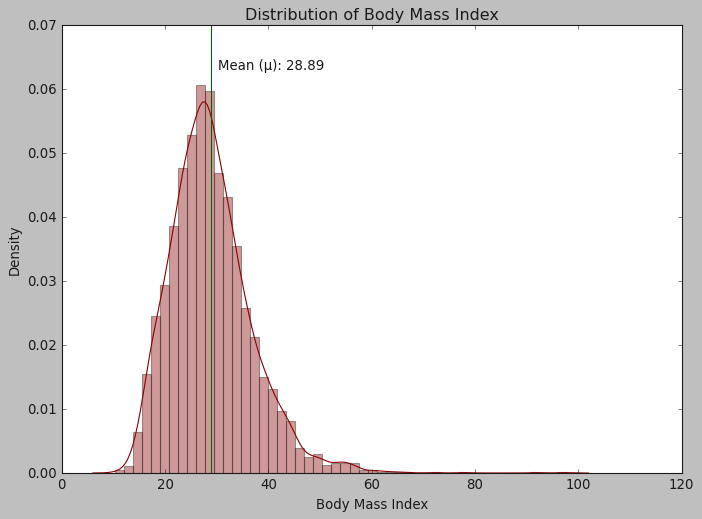

In [19]:
plt.style.use("classic")
plt.figure(figsize=(10, 7))
sns.distplot(data['bmi'], color='darkred', kde=True)
plt.axvline(data['bmi'].mean(), color='darkgreen', linestyle='-', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(data['bmi'].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(data['bmi'].mean()))
plt.xlabel("Body Mass Index")
plt.title(f"Distribution of Body Mass Index")
plt.show()

## Smoking Status 🚬

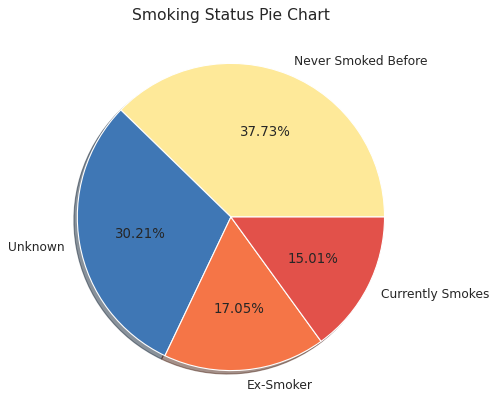

In [20]:
sns.set(style="whitegrid")
random.shuffle(colors)
labels = ["Never Smoked Before", "Unknown", "Ex-Smoker", "Currently Smokes"]
values = data['smoking_status'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors, shadow=True)
plt.title("Smoking Status Pie Chart", fontdict={'fontsize': 14})
plt.show()

## Stroke (Target Variable) 🌡

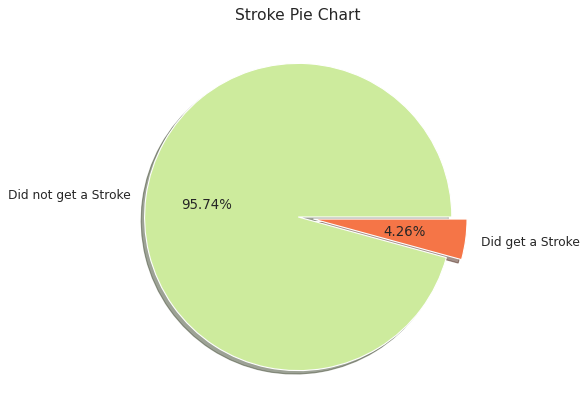

In [21]:
sns.set(style="whitegrid")
random.shuffle(colors)
labels = ["Did not get a Stroke", "Did get a Stroke"]
values = data['stroke'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", colors=colors, shadow=True, explode=[0, 0.1])
plt.title("Stroke Pie Chart", fontdict={'fontsize': 14})
plt.show()

### Relationship of Gender and Age

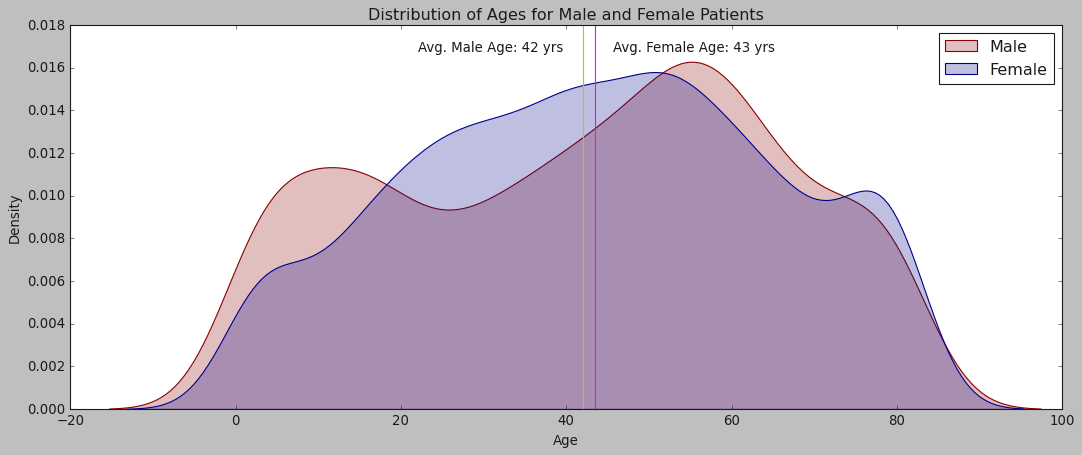

In [22]:
avg_male_age = data[data['gender'] == 'Male']['age'].mean()
avg_female_age = data[data['gender'] == 'Female']['age'].mean()

plt.style.use("classic")
plt.figure(figsize=(16, 6))
sns.kdeplot(data.loc[data['gender'] == 'Male', 'age'], label = 'Male', shade=True, color='darkred')
sns.kdeplot(data.loc[data['gender'] == 'Female', 'age'], label = 'Female', shade=True, color='darkblue')

plt.axvline(avg_male_age, color='orange', linestyle='-', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(avg_male_age-20, max_ylim*0.93, 'Avg. Male Age: {} yrs'.format(int(avg_male_age)))

plt.axvline(avg_female_age, color='magenta', linestyle='-', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(avg_female_age*1.05, max_ylim*0.93, 'Avg. Female Age: {} yrs'.format(int(avg_female_age)))

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages for Male and Female Patients')
plt.legend()
plt.show()

### Relationship of Age and Location

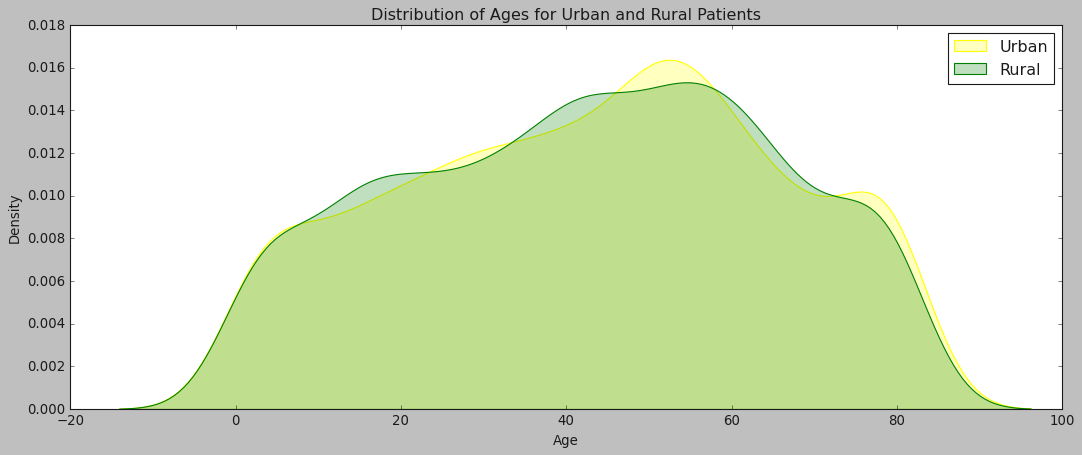

In [23]:
plt.style.use("classic")
plt.figure(figsize=(16, 6))
sns.kdeplot(data.loc[data['Residence_type'] == 'Urban', 'age'], label = 'Urban', shade=True, color='yellow')
sns.kdeplot(data.loc[data['Residence_type'] == 'Rural', 'age'], label = 'Rural', shade=True, color='green')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages for Urban and Rural Patients')
plt.legend()
plt.show()

### Relationship between Age and Average Glucose Level

In [24]:
fig = ff.create_2d_density(
    x=data['age'],
    y=data['avg_glucose_level'],
    title="Age-Average Glucose Level Density Plot",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)

fig.show()

### Relationship between Average Glucose Level and Body Mass Index

In [25]:
fig = ff.create_2d_density(
    x=data['avg_glucose_level'],
    y=data['bmi'],
    title="Average Glucose Level-BMI Density Plot",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)

fig.show()

### Relationship between Average Glucose Level and Stroke

In [26]:
fig = ff.create_2d_density(
    x=data['avg_glucose_level'],
    y=data['stroke'],
    title="Average Glucose Level-Stroke Density Plot",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)

fig.show()

### Relationship Between BMI and Stroke

In [27]:
fig = ff.create_2d_density(
    x=data['bmi'],
    y=data['stroke'],
    title="BMI-Stroke Density Plot",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)

fig.show()

### DABL PLot

Let's use DABL to see if we can come across

Target looks like classification
Linear Discriminant Analysis training set score: 0.500


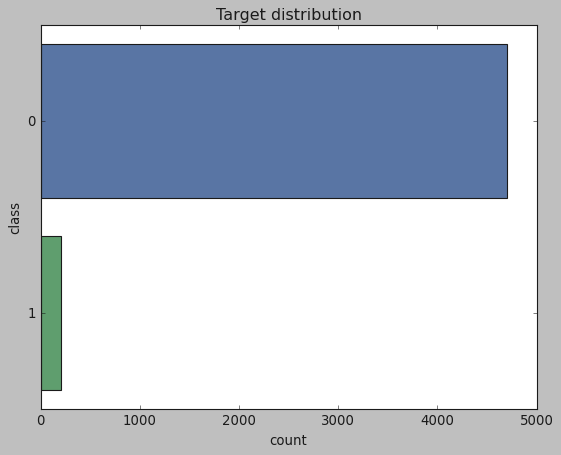

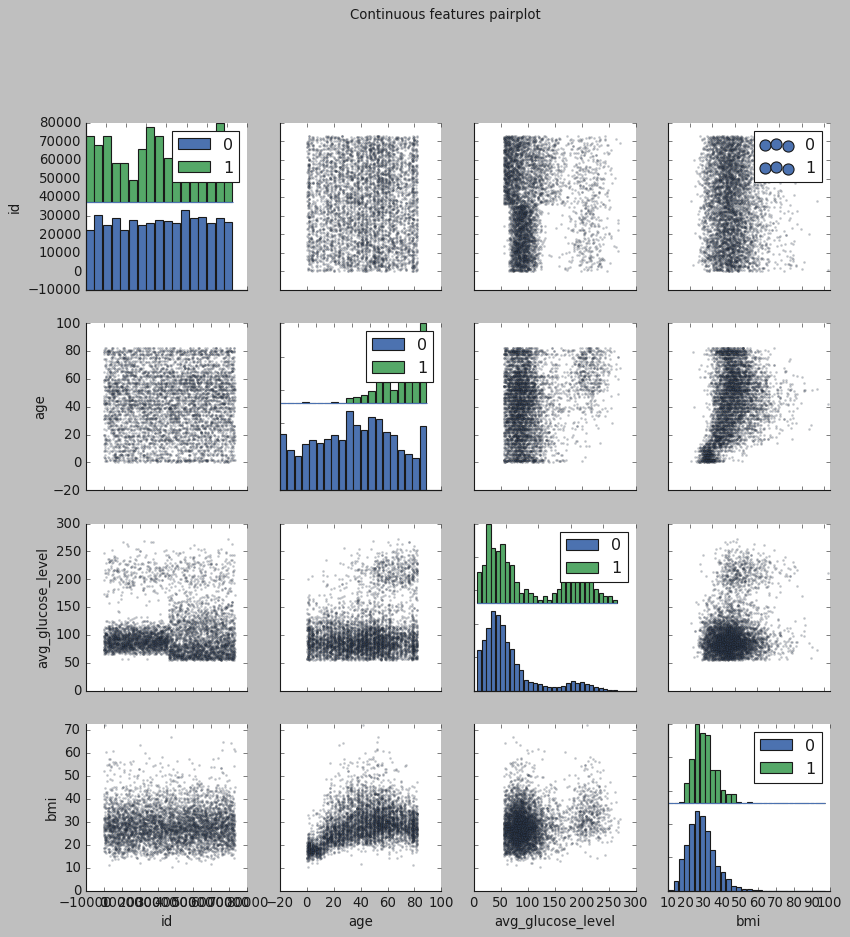

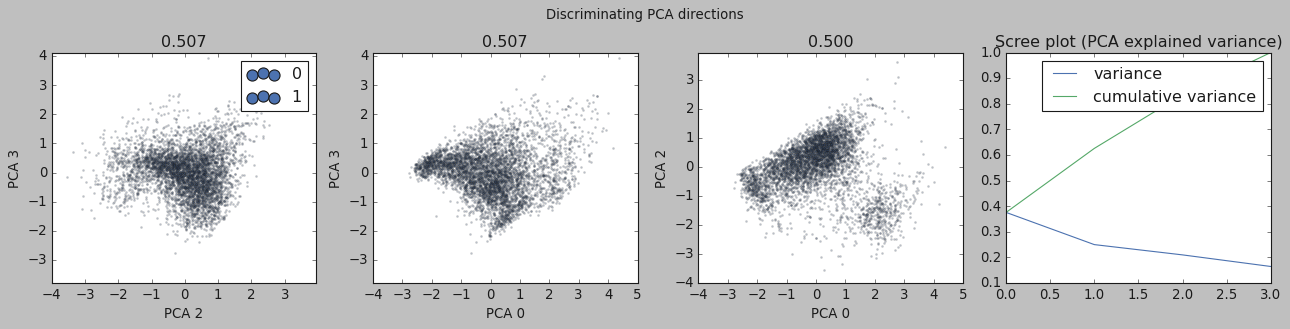

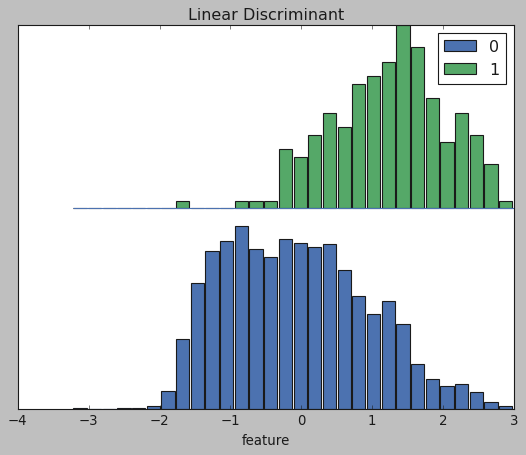

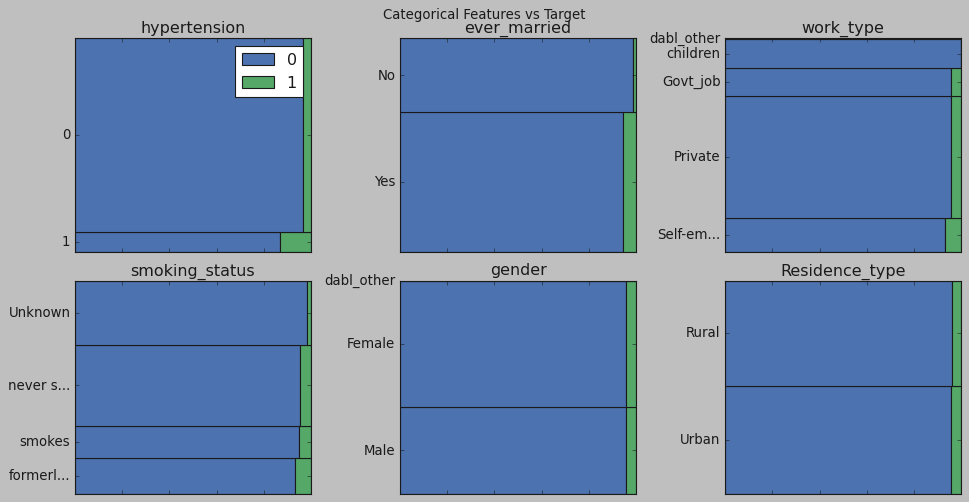

In [28]:
dabl.plot(data, y='stroke')